# Data Science Case Study - Predicting Accident Severity

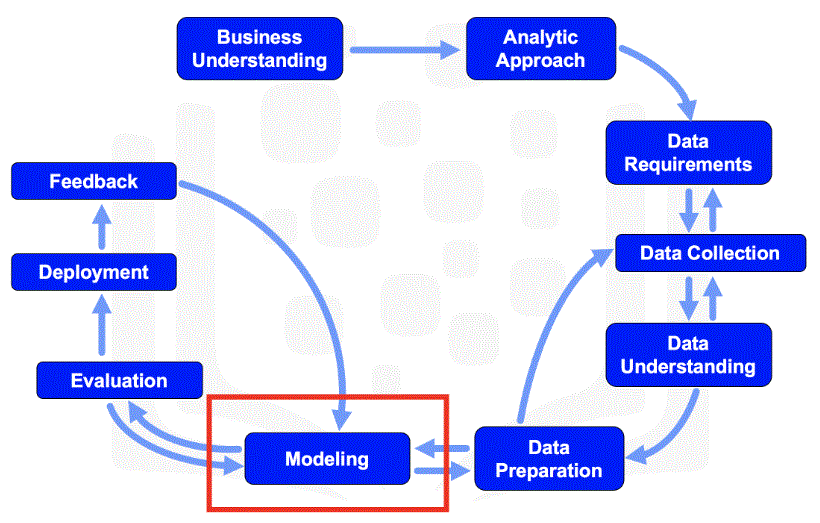

Data Science Methodology:
    
Phase 1: From Problem to Approach

    Step 1 - Business Understanding
    Step 2 - Analytic Approach

Phase 2: From Requirements to Collection 

    Step 3 - Data Requirements
    Step 4 - Data Collection

Phase 3: From Understanding to Preparation 

    Step 5 - Data Understanding
    Step 6 - Data Preparation  --> Step 4

Phase 4: From Modeling to Evaluation

    Step 7 - Modeling
    Step 8 - Evaluation

Phase 5: From Deployment to Feedback

    Step 9 - Deployment
    Step 10 - Feedback 

# Project Requirements:

Week 1 - Introduction and Data Exploration

    Module 1: Understanding Your Capstone Project
    Module 2: Setting up Your Github
    Module 3: Pre-processing Your Data
    (Steps 1-6)

    Quiz-1: Exploring The Data

    Peer Review: Setting up Github Account For The Project

Week 2 - Building Machine learning Model For Accident Severity

    
    Module 4: Building your Machine Learning Model
    Peer Review: Capstone Project-Car Accident Severity (Week 1)
    (Steps 7 - 8)

Week 3 - Capstone Project
    Peer Review: Capstone Project-Car Accident Severity (Week 2)
    
    (Steps 9-10)

# Week 1 - Introduction and Data Exploration:

# Module 1: Understanding Scale/Scope of Project:

    In this module, you will learn about the scope of this capstone course and the context of the project 
    that you will be working on. You will also be required to submit a link to a new repository on your Github
    account dedicated to this course.

# Step 1 - Data Science Methodology: Business Understanding

The objective of this case study project is to train and validate 3 machine learning models and evaluate how effectively they predict severity of traffic accidents in the Seattle Metropolitan area, for possible use in a phone app that will help drivers avoid potential traffic jams due to accidents.

# Module 2: Setting up Your Github:
In this module, you will be required to submit a link to a new repository on your Github
account dedicated to this course.

# Step 2 - Data Science Methodology: Analytic Approach:

In this project we train several machine learning classification models and evaluate how effectively they predict instances of traffic accident severity including:

SVM - Support Vector Machine

LGR - Logistic Regression

DNN - Deep Neural Network

After comparing the three models on training and validation data sets, the best in class will be deployed on a novel data set to evaluate how well it generalizes to new data. This is a standard Supervised Learning classification problem and uses a data set supplied by the city of Seattle DOT.

# Step 3 - Data Science Methodology : Data & Programming Requirements:

In [1]:
#Import Python Data Science and Machine Learning Libraries 

#Python Libraries
import pandas as pd
import pylab as pl
import numpy as np
import itertools

#Frameworks
import tensorflow as tf

#Visualizations and Graphics
%matplotlib inline
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
!conda install python-graphviz --yes
import graphviz
from sklearn.tree import export_graphviz
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
plt.rcParams['figure.figsize'] = (10, 6)
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import classification_report

#Models
from sklearn import svm
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.dummy import DummyClassifier
from sklearn import tree

#Model Parameters
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.datasets import make_classification

#Model Metrics
import sklearn.metrics as metrics
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import recall_score, precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score



C:\Users\cwl\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\cwl\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\cwl\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\cwl\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (type

Solving environment: ...working... done

# All requested packages already installed.



In [2]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot
    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix
    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']
    title:        the text to display at the top of the matrix
    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues
    normalize:    If False, plot the raw numbers
                  If True, plot the proportions
    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph
    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.2f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.2f}; misclass={:0.2f}'.format(accuracy, misclass))
    plt.show()

# Module 3: Pre-processing Your Data

# Step 4 - Data Science Methodology Data Collection:

Import the Dataset from .csv file

In [198]:
#Read csv file
accidentdata_df = pd.read_csv('D:\ibm_ds_cert\Data Science Capstone Project\Data-Collisions.csv',index_col = 0)
accidentdata_df.head()

C:\Users\cwl\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
SEVERITYCODE,,,,,,,,,,,,,,,,,,,,,
2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,5TH AVE NE AND NE 103RD ST,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,2ND AVE BETWEEN MARION ST AND MADISON ST,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,SWIFT AVE S AND SWIFT AV OFF RP,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [108]:
accident_df = accidentdata_df

# Step 5 - Data Science Methodology Data Understanding

In [109]:
#Explore the Data:
accident_df.dtypes

X                 float64
Y                 float64
OBJECTID            int64
INCKEY              int64
COLDETKEY           int64
REPORTNO           object
STATUS             object
ADDRTYPE           object
INTKEY            float64
LOCATION           object
EXCEPTRSNCODE      object
EXCEPTRSNDESC      object
SEVERITYCODE.1    float64
SEVERITYDESC       object
COLLISIONTYPE      object
PERSONCOUNT       float64
PEDCOUNT          float64
PEDCYLCOUNT       float64
VEHCOUNT          float64
INCDATE            object
INCDTTM            object
JUNCTIONTYPE       object
SDOT_COLCODE      float64
SDOT_COLDESC       object
INATTENTIONIND     object
UNDERINFL          object
WEATHER            object
ROADCOND           object
LIGHTCOND          object
PEDROWNOTGRNT      object
SDOTCOLNUM        float64
SPEEDING           object
ST_COLCODE         object
ST_COLDESC         object
SEGLANEKEY        float64
CROSSWALKKEY      float64
HITPARKEDCAR       object
dtype: object

In [110]:
accident_df.describe()

,X,Y,OBJECTID,INCKEY,COLDETKEY,INTKEY,SEVERITYCODE.1,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SDOT_COLCODE,SDOTCOLNUM,SEGLANEKEY,CROSSWALKKEY
count,189339.000000,189339.000000,194673.000000,194673.000000,194673.000000,65070.000000,189035.000000,189035.000000,189035.000000,189035.000000,189035.000000,189035.000000,1.677000e+04,28246.000000,2.824600e+04
mean,-122.330518,47.619543,108479.364930,141091.456350,141298.811381,37558.450576,1.305092,2.458116,0.037538,0.028778,1.928262,14.203729,8.510231e+06,768.036784,5.702189e+04
std,0.029976,0.056157,62649.722558,86634.402737,86986.542110,51745.990273,0.460447,1.358813,0.199208,0.168537,0.626162,6.614929,2.662567e+06,6148.283134,1.668475e+05
min,-122.419091,47.495573,1.000000,1001.000000,1001.000000,23807.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.001001e+06,0.000000,0.000000e+00
25%,-122.348673,47.575956,54267.000000,70383.000000,70383.000000,28667.000000,1.000000,2.000000,0.000000,0.000000,2.000000,11.000000,6.180031e+06,0.000000,0.000000e+00
50%,-122.330224,47.615369,106912.000000,123363.000000,123363.000000,29973.000000,1.000000,2.000000,0.000000,0.000000,2.000000,13.000000,8.329508e+06,0.000000,0.000000e+00
75%,-122.311937,47.663664,162272.000000,203319.000000,203459.000000,33973.000000,2.000000,3.000000,0.000000,0.000000,2.000000,14.000000,1.110303e+07,0.000000,0.000000e+00
max,-122.238949,47.734142,219547.000000,331454.000000,332954.000000,757580.000000,2.000000,81.000000,6.000000,2.000000,12.000000,69.000000,1.307202e+07,525169.000000,5.239700e+06


In [111]:
accident_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 194673 entries, 2 to 1
Data columns (total 37 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   X               189339 non-null  float64
 1   Y               189339 non-null  float64
 2   OBJECTID        194673 non-null  int64  
 3   INCKEY          194673 non-null  int64  
 4   COLDETKEY       194673 non-null  int64  
 5   REPORTNO        194673 non-null  object 
 6   STATUS          194673 non-null  object 
 7   ADDRTYPE        192747 non-null  object 
 8   INTKEY          65070 non-null   float64
 9   LOCATION        191996 non-null  object 
 10  EXCEPTRSNCODE   84811 non-null   object 
 11  EXCEPTRSNDESC   5638 non-null    object 
 12  SEVERITYCODE.1  189035 non-null  float64
 13  SEVERITYDESC    189035 non-null  object 
 14  COLLISIONTYPE   184904 non-null  object 
 15  PERSONCOUNT     189035 non-null  float64
 16  PEDCOUNT        189035 non-null  float64
 17  PEDCYLCOUNT    

<h1> Step 6 Data Science Methodology - Feature Engineering, Data Wrangling and Preparation:

Data preprocessing to remove any NaN, outliers, etc..</h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
<ul>
    <li><a href="#identify_handle_missing_values">Identify and handle missing values</a>
        <ul>
            <li><a href="#identify_missing_values">Identify missing values</a></li>
            <li><a href="#deal_missing_values">Deal with missing values</a></li>
            <li><a href="#correct_data_format">Correct data format</a></li>
        </ul>
    </li>
    <li><a href="#data_standardization">Data standardization</a></li>
    <li><a href="#data_normalization">Data Normalization (centering/scaling)</a></li>
    <li><a href="#binning">Binning</a></li>
    <li><a href="#indicator">Indicator variable</a></li>
</ul>

</div>
 
<hr>

In [112]:
#Examine Data for Null values
missing_data = accident_df.isnull()
missing_data.head(5)

,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
SEVERITYCODE,,,,,,,,,,,,,,,,,,,,,
2,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
1,False,False,False,False,False,False,False,False,True,False,...,True,True,True,True,True,True,True,True,True,True
1,False,False,False,False,False,False,False,False,True,False,...,True,True,True,True,True,True,True,True,True,True
1,False,False,False,False,False,False,False,False,True,False,...,True,True,True,True,True,True,True,True,True,True
2,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True


In [113]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    #print("")  

X
False    189339
True       5334
Name: X, dtype: int64
Y
False    189339
True       5334
Name: Y, dtype: int64
OBJECTID
False    194673
Name: OBJECTID, dtype: int64
INCKEY
False    194673
Name: INCKEY, dtype: int64
COLDETKEY
False    194673
Name: COLDETKEY, dtype: int64
REPORTNO
False    194673
Name: REPORTNO, dtype: int64
STATUS
False    194673
Name: STATUS, dtype: int64
ADDRTYPE
False    192747
True       1926
Name: ADDRTYPE, dtype: int64
INTKEY
True     129603
False     65070
Name: INTKEY, dtype: int64
LOCATION
False    191996
True       2677
Name: LOCATION, dtype: int64
EXCEPTRSNCODE
True     109862
False     84811
Name: EXCEPTRSNCODE, dtype: int64
EXCEPTRSNDESC
True     189035
False      5638
Name: EXCEPTRSNDESC, dtype: int64
SEVERITYCODE.1
False    189035
True       5638
Name: SEVERITYCODE.1, dtype: int64
SEVERITYDESC
False    189035
True       5638
Name: SEVERITYDESC, dtype: int64
COLLISIONTYPE
False    184904
True       9769
Name: COLLISIONTYPE, dtype: int64
PERSONCOUNT
False 

In [114]:
accident_df.iloc[:, 1:].eq(" ").sum(axis=0)
#(accident_df.values == "").sum(axis=0)

C:\Users\cwl\Anaconda3\lib\site-packages\pandas\core\computation\expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
C:\Users\cwl\Anaconda3\lib\site-packages\pandas\core\computation\expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)


Y                     0
OBJECTID              0
INCKEY                0
COLDETKEY             0
REPORTNO              0
STATUS                0
ADDRTYPE              0
INTKEY                0
LOCATION              0
EXCEPTRSNCODE     79173
EXCEPTRSNDESC         0
SEVERITYCODE.1        0
SEVERITYDESC          0
COLLISIONTYPE         0
PERSONCOUNT           0
PEDCOUNT              0
PEDCYLCOUNT           0
VEHCOUNT              0
INCDATE               0
INCDTTM               0
JUNCTIONTYPE          0
SDOT_COLCODE          0
SDOT_COLDESC          0
INATTENTIONIND        0
UNDERINFL             0
WEATHER               0
ROADCOND              0
LIGHTCOND             0
PEDROWNOTGRNT         0
SDOTCOLNUM            0
SPEEDING              0
ST_COLCODE          452
ST_COLDESC            0
SEGLANEKEY            0
CROSSWALKKEY          0
HITPARKEDCAR          0
dtype: int64

In [115]:
count_sev1 = len(accident_df[accident_df['SEVERITYCODE.1']==1])
count_sev2 = len(accident_df[accident_df['SEVERITYCODE.1']==2])
pct_sev1 = count_sev1/(count_sev1+count_sev2)
print("percentage sev1", round(pct_sev1*100,2))
pct_sev2 = count_sev2/(count_sev1+count_sev2)
print("percentage sev2", round(pct_sev2*100,2))

percentage sev1 69.49
percentage sev2 30.51


In [116]:
accident_correl_df = accident_df.corr()

In [117]:
accident_correl_df = accident_df.corr()
accident_correl_df.to_csv('accident_correl_df.csv')

<h3 id="deal_missing_values">Deal with missing Target data</h3>
<b>How to deal with missing data?</b>

<ol>
    <li>drop data<br>
        a. drop the whole row<br>
        b. drop the whole column
    </li>
    <li>replace data<br>
        a. replace it by mean<br>
        b. replace it by frequency<br>
        c. replace it based on other functions
    </li>
</ol>

Whole columns should be dropped only if most entries in the column are empty. In our dataset, none of the columns are empty enough to drop entirely.
We have some freedom in choosing which method to replace data; however, some methods may seem more reasonable than others. We will apply each method to many different columns:


<b>Drop the whole column:</b>

<ul>
    <li>"SEVERITYCODE.1	": missing data, simply delete the whole column
        <ul>
            <li>Reason: SEVERITYCODE.1 data is missing values, whereas SEVERITYCODE is complete so we will substitute that in for the Target/Lable data</li>
        </ul>
    </li>
</ul>

In [119]:
accident_df.reset_index(level=0, inplace=True)
accident_df.rename(columns={'SEVERITYCODE': 'SEVCODE'},inplace=True)
del accident_df['SEVERITYCODE.1']

In [120]:
#Examine Data for Null values
missing_data = accident_df.isnull()
missing_data.head(5)

,SEVCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
1,False,False,False,False,False,False,False,False,False,True,...,True,True,True,True,True,True,True,True,True,True
2,False,False,False,False,False,False,False,False,False,True,...,True,True,True,True,True,True,True,True,True,True
3,False,False,False,False,False,False,False,False,False,True,...,True,True,True,True,True,True,True,True,True,True
4,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True


In [121]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")  

SEVCODE
False    194673
Name: SEVCODE, dtype: int64

X
False    189339
True       5334
Name: X, dtype: int64

Y
False    189339
True       5334
Name: Y, dtype: int64

OBJECTID
False    194673
Name: OBJECTID, dtype: int64

INCKEY
False    194673
Name: INCKEY, dtype: int64

COLDETKEY
False    194673
Name: COLDETKEY, dtype: int64

REPORTNO
False    194673
Name: REPORTNO, dtype: int64

STATUS
False    194673
Name: STATUS, dtype: int64

ADDRTYPE
False    192747
True       1926
Name: ADDRTYPE, dtype: int64

INTKEY
True     129603
False     65070
Name: INTKEY, dtype: int64

LOCATION
False    191996
True       2677
Name: LOCATION, dtype: int64

EXCEPTRSNCODE
True     109862
False     84811
Name: EXCEPTRSNCODE, dtype: int64

EXCEPTRSNDESC
True     189035
False      5638
Name: EXCEPTRSNDESC, dtype: int64

SEVERITYDESC
False    189035
True       5638
Name: SEVERITYDESC, dtype: int64

COLLISIONTYPE
False    184904
True       9769
Name: COLLISIONTYPE, dtype: int64

PERSONCOUNT
False    189035
True 

# Feature Engineering  - Preprocessing Operations Schedule

In [123]:
data_wrangle_df = pd.read_csv('D:\ibm_ds_cert\Data Science Capstone Project\DataWrangle.csv',index_col = 0)
data_wrangle_df

,Feature,FALSE,TRUE,type,X-Check,Unique,Notes
#,,,,,,,
1,X,189339,5334.0,int64,X,23563,mean
2,Y,189339,5334.0,int64,Y,23839,mean
3,OBJECTID,194673,NaN,int64,OBJECTID,194673,drop
4,INCKEY,194673,NaN,int64,INCKEY,194673,drop
5,COLDETKEY,194673,NaN,int64,COLDETKEY,194673,drop
6,REPORTNO,194673,NaN,int64,REPORTNO,194670,drop
7,STATUS,194673,1926.0,int64,STATUS,2,drop
8,ADDRTYPE,129603,65070.0,int64,ADDRTYPE,3,one hot
9,INTKEY,191996,2677.0,int64,INTKEY,7614,"Value = 1 if > 0, 0 if """""


In [124]:
cols_2_keep = ['X','Y','ADDRTYPE','INTKEY','SEVCODE','SEVERITYDESC','COLLISIONTYPE',
                'PERSONCOUNT','PEDCOUNT','PEDCYLCOUNT','VEHCOUNT','INCDATE','INCDTTM','JUNCTIONTYPE',
                'SDOT_COLCODE','INATTENTIONIND','UNDERINFL','WEATHER','ROADCOND','LIGHTCOND',
                'PEDROWNOTGRNT','SPEEDING','ST_COLCODE','SEGLANEKEY','CROSSWALKKEY','HITPARKEDCAR']

In [125]:
accidentpp_df = accident_df[cols_2_keep]
accidentpp_df.head()

,X,Y,ADDRTYPE,INTKEY,SEVCODE,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,...,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,ST_COLCODE,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,-122.323148,47.703140,Intersection,37475.0,2,Injury Collision,Angles,2.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-122.347294,47.647172,Block,NaN,1,Property Damage Only Collision,Sideswipe,2.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-122.334540,47.607871,Block,NaN,1,Property Damage Only Collision,Parked Car,4.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-122.334803,47.604803,Block,NaN,1,Property Damage Only Collision,Other,3.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-122.306426,47.545739,Intersection,34387.0,2,Injury Collision,Angles,2.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [126]:
#Encoding categorical features in dataframe columns
#37
accidentpp_df['HITPARKEDCAR'].replace({'N': 0, 'Y': 1})
accidentpp_df['HITPARKEDCAR'] = np.where(accidentpp_df['HITPARKEDCAR'] =='Y',
                                             1.0, accidentpp_df['HITPARKEDCAR'])
accidentpp_df['HITPARKEDCAR'] = np.where(accidentpp_df['HITPARKEDCAR'] =='N',
                                             0.0, accidentpp_df['HITPARKEDCAR'])
accidentpp_df['HITPARKEDCAR'].fillna(0, inplace=True)
print('HITPARKEDCAR sum of 1s: ',accidentpp_df['HITPARKEDCAR'].sum())
print('HITPARKEDCAR Vector Size :', accidentpp_df['HITPARKEDCAR'].size)

#36
accidentpp_df['CROSSWALKKEY'] = np.where(accidentpp_df['CROSSWALKKEY'] > 0,1.0, accidentpp_df['CROSSWALKKEY'])
print('sum of 1s: ',accidentpp_df['CROSSWALKKEY'].sum())
print('Vector Size :', accidentpp_df['CROSSWALKKEY'].size)

#35
accidentpp_df['SEGLANEKEY'] = np.where(accidentpp_df['SEGLANEKEY'] > 0,
                                             1.0, accidentpp_df['SEGLANEKEY'])
print('SEGLANEKEY sum of 1s: ',accidentpp_df['SEGLANEKEY'].sum())
print('SEGLANEKEY Vector Size :', accidentpp_df['SEGLANEKEY'].size)

#32
accidentpp_df['SPEEDING'] = np.where(accidentpp_df['SPEEDING'] =='Y',
                                             1.0, accidentpp_df['SPEEDING'])
accidentpp_df['SPEEDING'] = np.where(accidentpp_df['SPEEDING'] =='N',
                                             0.0, accidentpp_df['SPEEDING'])
accidentpp_df['SPEEDING'].fillna(0, inplace=True)
print('SPEEDING sum of 1s: ',accidentpp_df['SPEEDING'].sum())
print('SPEEDING Vector Size :', accidentpp_df['SPEEDING'].size)

#30
accidentpp_df['PEDROWNOTGRNT'] = np.where(accidentpp_df['PEDROWNOTGRNT'] =='Y' ,
                                             1.0, accidentpp_df['PEDROWNOTGRNT'])
accidentpp_df['PEDROWNOTGRNT'] = np.where(accidentpp_df['PEDROWNOTGRNT'] =="" ,
                                             0.0, accidentpp_df['PEDROWNOTGRNT'])
accidentpp_df['PEDROWNOTGRNT'].fillna(0, inplace=True)
print('PEDROWNOTGRNT sum of 1s: ',accidentpp_df['PEDROWNOTGRNT'].sum())
print('PEDROWNOTGRNT Vector Size :', accidentpp_df['PEDROWNOTGRNT'].size)

#26
accidentpp_df['UNDERINFL'] = np.where(accidentpp_df['UNDERINFL'] =='Y' ,
                                             float(1.0), accidentpp_df['UNDERINFL'])
accidentpp_df['UNDERINFL'] = np.where(accidentpp_df['UNDERINFL'] == 'N' ,
                                             float(0.0), accidentpp_df['UNDERINFL'])
accidentpp_df['UNDERINFL'].fillna(0, inplace=True)
#print('UNDERINFL sum of 1s: ',accidentpp_df['UNDERINFL'].sum())
print('UNDERINFL Vector Size :', accidentpp_df['UNDERINFL'].size)

#25
accidentpp_df['INATTENTIONIND'] = np.where(accidentpp_df['INATTENTIONIND'] =='Y' ,
                                             float(1.0), accidentpp_df['INATTENTIONIND'])
accidentpp_df['INATTENTIONIND'] = np.where(accidentpp_df['INATTENTIONIND'] == " " ,
                                             float(0.0), accidentpp_df['INATTENTIONIND'])
accidentpp_df['INATTENTIONIND'].fillna(0, inplace=True)
print('INATTENTIONIND sum of 1s: ',accidentpp_df['INATTENTIONIND'].sum())
print('INATTENTIONIND Vector Size :', accidentpp_df['INATTENTIONIND'].size)

#23
accidentpp_df['SDOT_COLCODE'].fillna(int(accidentpp_df['SDOT_COLCODE'].mean()), inplace=True)

#19
accidentpp_df['VEHCOUNT'].fillna(int(accidentpp_df['VEHCOUNT'].mean()), inplace=True)

#18
accidentpp_df['PEDCYLCOUNT'].fillna(int(accidentpp_df['PEDCYLCOUNT'].mean()), inplace=True)

#17
accidentpp_df['PEDCOUNT'].fillna(int(accidentpp_df['PEDCOUNT'].mean()), inplace=True)

#16
accidentpp_df['PERSONCOUNT'].fillna(int(accidentpp_df['PERSONCOUNT'].mean()), inplace=True)

#14
accidentpp_df['SEVERITYDESC'] = np.where(accidentpp_df['SEVERITYDESC'] =='Property Damage Only Collision',
                                             float(0.0), accidentpp_df['SEVERITYDESC'])
accidentpp_df['SEVERITYDESC'] = np.where(accidentpp_df['SEVERITYDESC'] == "Injury Collision" ,
                                             float(1.0), accidentpp_df['SEVERITYDESC'])
accidentpp_df['SEVERITYDESC'] = np.where(accidentpp_df['SEVERITYDESC'] == "" ,
                                             float(77.0), accidentpp_df['SEVERITYDESC'])
accidentpp_df['SEVERITYDESC'].fillna(float(77.0), inplace=True)


#9
accidentpp_df['INTKEY'] = np.where(accidentpp_df['INTKEY'] > 0 ,
                                             float(1.0), accidentpp_df['INTKEY'])
accidentpp_df['INTKEY'] = np.where(accidentpp_df['INTKEY'] == " " ,
                                             float(0.0), accidentpp_df['INTKEY'])


accidentpp_df['INTKEY'].fillna(0, inplace=True)
print('INTKEY sum of 1s: ',accidentpp_df['INTKEY'].sum())
print('INTKEY Vector Size :', accidentpp_df['INTKEY'].size)

#1-2
accidentpp_df['X'] = np.where(accidentpp_df['X'] ==" ",
                                             float(-122.330518), accidentpp_df['X'])
accidentpp_df['Y'] = np.where(accidentpp_df['Y'] == " " ,
                                             float(47.619543), accidentpp_df['Y'])

accidentpp_df['X'].fillna(float(-122.330518), inplace=True)

accidentpp_df['Y'].fillna(float(47.619543), inplace=True)


C:\Users\cwl\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\cwl\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\cwl\Anaconda3\lib\site-packages\pandas\core\series.py:4523: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_

HITPARKEDCAR sum of 1s:  882.0
HITPARKEDCAR Vector Size : 194673
sum of 1s:  3212.0
Vector Size : 194673
SEGLANEKEY sum of 1s:  1141.0
SEGLANEKEY Vector Size : 194673


C:\Users\cwl\Anaconda3\lib\site-packages\pandas\core\series.py:4523: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,
C:\Users\cwl\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\cwl\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#

SPEEDING sum of 1s:  3624.0
SPEEDING Vector Size : 194673
PEDROWNOTGRNT sum of 1s:  3293.0
PEDROWNOTGRNT Vector Size : 194673


C:\Users\cwl\Anaconda3\lib\site-packages\ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\cwl\Anaconda3\lib\site-packages\ipykernel_launcher.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


UNDERINFL Vector Size : 194673


C:\Users\cwl\Anaconda3\lib\site-packages\ipykernel_launcher.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\cwl\Anaconda3\lib\site-packages\ipykernel_launcher.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


INATTENTIONIND sum of 1s:  3343.0
INATTENTIONIND Vector Size : 194673


C:\Users\cwl\Anaconda3\lib\site-packages\ipykernel_launcher.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\cwl\Anaconda3\lib\site-packages\ipykernel_launcher.py:77: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\cwl\Anaconda3\lib\site-packages\ipykernel_launcher.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

INTKEY sum of 1s:  65070.0
INTKEY Vector Size : 194673


C:\Users\cwl\Anaconda3\lib\site-packages\pandas\core\computation\expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
C:\Users\cwl\Anaconda3\lib\site-packages\ipykernel_launcher.py:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\cwl\Anaconda3\lib\site-packages\pandas\core\series.py:4523: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,
C:\Users\cwl\Anaconda3\lib\site-packages\pandas\core\computation\expressions.py:68: FutureWarni

In [127]:
accidentpp_df.head()

,X,Y,ADDRTYPE,INTKEY,SEVCODE,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,...,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,ST_COLCODE,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,-122.323148,47.703140,Intersection,1.0,2,1.0,Angles,2.0,0.0,0.0,...,0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,0.0
1,-122.347294,47.647172,Block,0.0,1,0.0,Sideswipe,2.0,0.0,0.0,...,0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,0.0
2,-122.334540,47.607871,Block,0.0,1,0.0,Parked Car,4.0,0.0,0.0,...,0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,0.0
3,-122.334803,47.604803,Block,0.0,1,0.0,Other,3.0,0.0,0.0,...,0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,0.0
4,-122.306426,47.545739,Intersection,1.0,2,1.0,Angles,2.0,0.0,0.0,...,0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,0.0


In [128]:
#Examine Data for Null values
missing_dataA = accidentpp_df.isnull()
missing_dataA.head(5)

,X,Y,ADDRTYPE,INTKEY,SEVCODE,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,...,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,ST_COLCODE,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,False,False,False,False,False,False,False,False,False,False,...,False,True,True,True,False,False,True,True,True,False
1,False,False,False,False,False,False,False,False,False,False,...,False,True,True,True,False,False,True,True,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,True,True,True,False,False,True,True,True,False
3,False,False,False,False,False,False,False,False,False,False,...,False,True,True,True,False,False,True,True,True,False
4,False,False,False,False,False,False,False,False,False,False,...,False,True,True,True,False,False,True,True,True,False


In [129]:
for column in missing_dataA.columns.values.tolist():
    print(column)
    print (missing_dataA[column].value_counts())
    print("") 

X
False    194673
Name: X, dtype: int64

Y
False    194673
Name: Y, dtype: int64

ADDRTYPE
False    192747
True       1926
Name: ADDRTYPE, dtype: int64

INTKEY
False    194673
Name: INTKEY, dtype: int64

SEVCODE
False    194673
Name: SEVCODE, dtype: int64

SEVERITYDESC
False    194673
Name: SEVERITYDESC, dtype: int64

COLLISIONTYPE
False    184904
True       9769
Name: COLLISIONTYPE, dtype: int64

PERSONCOUNT
False    194673
Name: PERSONCOUNT, dtype: int64

PEDCOUNT
False    194673
Name: PEDCOUNT, dtype: int64

PEDCYLCOUNT
False    194673
Name: PEDCYLCOUNT, dtype: int64

VEHCOUNT
False    194673
Name: VEHCOUNT, dtype: int64

INCDATE
False    189035
True       5638
Name: INCDATE, dtype: int64

INCDTTM
False    189035
True       5638
Name: INCDTTM, dtype: int64

JUNCTIONTYPE
False    185573
True       9100
Name: JUNCTIONTYPE, dtype: int64

SDOT_COLCODE
False    194673
Name: SDOT_COLCODE, dtype: int64

INATTENTIONIND
False    194673
Name: INATTENTIONIND, dtype: int64

UNDERINFL
False    1

In [130]:
accidentpp_df['INCDTTM'].fillna(0, inplace=True)

C:\Users\cwl\Anaconda3\lib\site-packages\pandas\core\series.py:4523: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [131]:
df = pd.DataFrame(data={'date':['05/16/16',''], 'Indicator':[1,0]})
df['date']=pd.to_datetime(df['date'])
df

,date,Indicator
0,2016-05-16,1
1,NaT,0


In [132]:
accidentpp_df['INCDTTM'] = pd.to_datetime(accidentpp_df['INCDTTM'])
accidentpp_df['Time'],accidentpp_df['Date']= accidentpp_df['INCDTTM'].apply(lambda x:x.time()), \
                                            accidentpp_df['INCDTTM'].apply(lambda x:x.date())

C:\Users\cwl\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\cwl\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [133]:
accidentpp_df['Time'] = pd.to_timedelta(accidentpp_df['Time'].astype(str))
accidentpp_df['Time'].describe()


C:\Users\cwl\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


count                       194673
mean     0 days 11:13:24.377802776
std      0 days 07:20:42.460703433
min                0 days 00:00:00
25%                0 days 05:00:00
50%                0 days 12:35:00
75%                0 days 17:05:00
max                0 days 23:59:00
Name: Time, dtype: object

In [134]:
accidentpp_df['Hours'] =accidentpp_df['Time'].dt.components.hours
accidentpp_df['Mins'] =accidentpp_df['Time'].dt.components.minutes

accidentpp_df['Hours'] = accidentpp_df['Hours'].astype(float)
accidentpp_df['Mins'] = accidentpp_df['Mins'].astype(float)

C:\Users\cwl\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\cwl\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\cwl\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

In [135]:
accidentpp_df['HofD'] = np.where(accidentpp_df['Mins'] > 30,
                                             accidentpp_df['Hours']+ 1, accidentpp_df['Hours'])

accidentpp_df['HofD'] = np.where(accidentpp_df['HofD'] > 24, 1, accidentpp_df['HofD'])


C:\Users\cwl\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\cwl\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [136]:
print('Non-zero hours: ',(accidentpp_df['HofD']!= 0).sum())
print('HofD: ',accidentpp_df['HofD'].size)

Non-zero hours:  157100
HofD:  194673


In [197]:
accidentpp_df.head(5)

,X,Y,INTKEY,SEVCODE,SEVERITYDESC,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SDOT_COLCODE,...,HofD,Year,Month,Day,colltype_code,addrtype_code,junctype_code,weather_code,roadcond_code,lightcond_code
0,-122.323148,47.703140,1.0,2,1,2.0,0.0,0.0,2.0,11.0,...,15.0,2013,3,27,0,2,1,11,9,9
1,-122.347294,47.647172,0.0,1,0,2.0,0.0,0.0,2.0,16.0,...,19.0,2006,12,20,9,1,4,11,9,9
2,-122.334540,47.607871,0.0,1,0,4.0,0.0,0.0,3.0,14.0,...,10.0,2004,11,18,5,1,4,11,9,9
3,-122.334803,47.604803,0.0,1,0,3.0,0.0,0.0,3.0,11.0,...,9.0,2013,3,29,4,1,4,11,9,9
4,-122.306426,47.545739,1.0,2,1,2.0,0.0,0.0,2.0,11.0,...,8.0,2004,1,28,0,2,1,11,9,9


In [138]:
accidentpp_df['Dates']= pd.to_datetime(accidentpp_df['Date'],format='%Y-%m-%d')

C:\Users\cwl\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [139]:
accidentpp_df['Year'] = accidentpp_df['Dates'].dt.year
accidentpp_df['Month'] = accidentpp_df['Dates'].dt.month
accidentpp_df['Day'] = accidentpp_df['Dates'].dt.day

C:\Users\cwl\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\cwl\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\cwl\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

In [140]:
del accidentpp_df['Time']
del accidentpp_df['Date']
del accidentpp_df['Hours']
del accidentpp_df['Mins']
del accidentpp_df['Dates']

accidentpp_df.head(5)

,X,Y,ADDRTYPE,INTKEY,SEVCODE,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,...,PEDROWNOTGRNT,SPEEDING,ST_COLCODE,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR,HofD,Year,Month,Day
0,-122.323148,47.703140,Intersection,1.0,2,1.0,Angles,2.0,0.0,0.0,...,0.0,0.0,NaN,NaN,NaN,0.0,15.0,2013,3,27
1,-122.347294,47.647172,Block,0.0,1,0.0,Sideswipe,2.0,0.0,0.0,...,0.0,0.0,NaN,NaN,NaN,0.0,19.0,2006,12,20
2,-122.334540,47.607871,Block,0.0,1,0.0,Parked Car,4.0,0.0,0.0,...,0.0,0.0,NaN,NaN,NaN,0.0,10.0,2004,11,18
3,-122.334803,47.604803,Block,0.0,1,0.0,Other,3.0,0.0,0.0,...,0.0,0.0,NaN,NaN,NaN,0.0,9.0,2013,3,29
4,-122.306426,47.545739,Intersection,1.0,2,1.0,Angles,2.0,0.0,0.0,...,0.0,0.0,NaN,NaN,NaN,0.0,8.0,2004,1,28


In [141]:
#Examine Data for Null values
missing_datav2 = accidentpp_df.isnull()
missing_datav2.head(5)

,X,Y,ADDRTYPE,INTKEY,SEVCODE,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,...,PEDROWNOTGRNT,SPEEDING,ST_COLCODE,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR,HofD,Year,Month,Day
0,False,False,False,False,False,False,False,False,False,False,...,False,False,True,True,True,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,True,True,True,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,True,True,True,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,True,True,True,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,True,True,True,False,False,False,False,False


In [142]:
for column in missing_datav2.columns.values.tolist():
    print(column)
    print (missing_datav2[column].value_counts())
    print("")  

X
False    194673
Name: X, dtype: int64

Y
False    194673
Name: Y, dtype: int64

ADDRTYPE
False    192747
True       1926
Name: ADDRTYPE, dtype: int64

INTKEY
False    194673
Name: INTKEY, dtype: int64

SEVCODE
False    194673
Name: SEVCODE, dtype: int64

SEVERITYDESC
False    194673
Name: SEVERITYDESC, dtype: int64

COLLISIONTYPE
False    184904
True       9769
Name: COLLISIONTYPE, dtype: int64

PERSONCOUNT
False    194673
Name: PERSONCOUNT, dtype: int64

PEDCOUNT
False    194673
Name: PEDCOUNT, dtype: int64

PEDCYLCOUNT
False    194673
Name: PEDCYLCOUNT, dtype: int64

VEHCOUNT
False    194673
Name: VEHCOUNT, dtype: int64

INCDATE
False    189035
True       5638
Name: INCDATE, dtype: int64

INCDTTM
False    194673
Name: INCDTTM, dtype: int64

JUNCTIONTYPE
False    185573
True       9100
Name: JUNCTIONTYPE, dtype: int64

SDOT_COLCODE
False    194673
Name: SDOT_COLCODE, dtype: int64

INATTENTIONIND
False    194673
Name: INATTENTIONIND, dtype: int64

UNDERINFL
False    194673
Name: UNDE

In [143]:
#accidentpp_fin_df = accidentpp_df.dropna()
accidentpp_df.shape

(194673, 30)

In [147]:
del  accidentpp_df['INCDATE']
del  accidentpp_df['INCDTTM']
del  accidentpp_df['ST_COLCODE']
del  accidentpp_df['SEGLANEKEY']
del  accidentpp_df['CROSSWALKKEY']

In [148]:
le = preprocessing.LabelEncoder()
accidentpp_df['ADDRTYPE'] = le.fit_transform(accidentpp_df['ADDRTYPE'].astype(str))
accidentpp_df['COLLISIONTYPE'] = le.fit_transform(accidentpp_df['COLLISIONTYPE'].astype(str))
accidentpp_df['SEVERITYDESC'] = le.fit_transform(accidentpp_df['SEVERITYDESC'].astype(str))
accidentpp_df['JUNCTIONTYPE'] = le.fit_transform(accidentpp_df['JUNCTIONTYPE'].astype(str))
accidentpp_df['UNDERINFL'] = le.fit_transform(accidentpp_df['UNDERINFL'].astype(str))
accidentpp_df['WEATHER'] = le.fit_transform(accidentpp_df['WEATHER'].astype(str))
accidentpp_df['ROADCOND'] = le.fit_transform(accidentpp_df['ROADCOND'].astype(str))
accidentpp_df['LIGHTCOND'] = le.fit_transform(accidentpp_df['LIGHTCOND'].astype(str))
#accidentpp_df['ST_COLCODE'] = le.fit_transform(accidentpp_df['ST_COLCODE'].astype(str))


C:\Users\cwl\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\cwl\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\cwl\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value i

In [150]:
from sklearn.preprocessing import LabelEncoder
onehot_df= pd.DataFrame()
onehot_df= onehot_df.fillna(0) # with 0s rather than NaNs

lb_junc1 = LabelEncoder()
onehot_df["colltype_code"] = lb_junc1.fit_transform(accidentpp_df['COLLISIONTYPE'])
accidentpp_df["colltype_code"] = onehot_df["colltype_code"].values
#onehot_df[["colltype_code"]].head(11)

lb_junc2 = LabelEncoder()
onehot_df["addrtype_code"] = lb_junc2.fit_transform(accidentpp_df['ADDRTYPE'])
accidentpp_df["addrtype_code"] = onehot_df["addrtype_code"].values
#onehot_df[["colltype_code"]].head(11)

lb_junc3 = LabelEncoder()
onehot_df["junctype_code"] = lb_junc3.fit_transform(accidentpp_df['JUNCTIONTYPE'])
accidentpp_df["junctype_code"] = onehot_df["junctype_code"].values
#onehot_df[["colltype_code"]].head(11)

lb_junc4 = LabelEncoder()
onehot_df["weather_code"] = lb_junc4.fit_transform(accidentpp_df['WEATHER'])
accidentpp_df["weather_code"] = onehot_df["weather_code"].values
#onehot_df[["colltype_code"]].head(11)

lb_junc5 = LabelEncoder()
onehot_df["roadcond_code"] = lb_junc5.fit_transform(accidentpp_df['ROADCOND'])
accidentpp_df["roadcond_code"] = onehot_df["roadcond_code"].values
#onehot_df[["colltype_code"]].head(11)

lb_junc6 = LabelEncoder()
onehot_df["lightcond_code"] = lb_junc6.fit_transform(accidentpp_df['LIGHTCOND'])
accidentpp_df["lightcond_code"] = onehot_df["lightcond_code"].values
#onehot_df[["colltype_code"]].head(11)

C:\Users\cwl\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\cwl\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
C:\Users\cwl\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

In [151]:
del accidentpp_df['ADDRTYPE']
del accidentpp_df['COLLISIONTYPE']
del accidentpp_df['JUNCTIONTYPE']
del accidentpp_df['WEATHER']
del accidentpp_df['ROADCOND']
del accidentpp_df['LIGHTCOND']

In [152]:
accidentpp_df.head(10)

,X,Y,INTKEY,SEVCODE,SEVERITYDESC,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SDOT_COLCODE,...,HofD,Year,Month,Day,colltype_code,addrtype_code,junctype_code,weather_code,roadcond_code,lightcond_code
0,-122.323148,47.703140,1.0,2,1,2.0,0.0,0.0,2.0,11.0,...,15.0,2013,3,27,0,2,1,11,9,9
1,-122.347294,47.647172,0.0,1,0,2.0,0.0,0.0,2.0,16.0,...,19.0,2006,12,20,9,1,4,11,9,9
2,-122.334540,47.607871,0.0,1,0,4.0,0.0,0.0,3.0,14.0,...,10.0,2004,11,18,5,1,4,11,9,9
3,-122.334803,47.604803,0.0,1,0,3.0,0.0,0.0,3.0,11.0,...,9.0,2013,3,29,4,1,4,11,9,9
4,-122.306426,47.545739,1.0,2,1,2.0,0.0,0.0,2.0,11.0,...,8.0,2004,1,28,0,2,1,11,9,9
5,-122.387598,47.690575,1.0,1,0,2.0,0.0,0.0,2.0,11.0,...,18.0,2019,4,20,0,2,1,11,9,9
6,-122.338485,47.618534,1.0,1,0,2.0,0.0,0.0,2.0,11.0,...,0.0,2008,12,9,0,2,1,11,9,9
7,-122.320780,47.614076,1.0,2,1,3.0,0.0,1.0,1.0,51.0,...,18.0,2020,4,15,1,2,1,1,0,5
8,-122.335930,47.611904,0.0,1,0,2.0,0.0,0.0,2.0,11.0,...,13.0,2006,6,15,5,1,4,11,9,9
9,-122.384700,47.528475,1.0,2,1,2.0,0.0,0.0,2.0,11.0,...,16.0,2006,3,20,0,2,1,11,9,9


In [199]:
model_df = accidentpp_df
accid_viz_df = accidentpp_df
#model_df.nunique()

In [155]:
model_df.dtypes

X                 float64
Y                 float64
INTKEY            float64
SEVCODE             int64
SEVERITYDESC        int32
PERSONCOUNT       float64
PEDCOUNT          float64
PEDCYLCOUNT       float64
VEHCOUNT          float64
SDOT_COLCODE      float64
INATTENTIONIND    float64
UNDERINFL           int32
PEDROWNOTGRNT     float64
SPEEDING          float64
HITPARKEDCAR      float64
HofD              float64
Year                int64
Month               int64
Day                 int64
colltype_code       int64
addrtype_code       int64
junctype_code       int64
weather_code        int64
roadcond_code       int64
lightcond_code      int64
dtype: object

In [156]:
model_df.shape

(194673, 25)

In [157]:
#Examine Data for Null values
missing_datav4 = model_df.isnull()
missing_datav4.head(5)

,X,Y,INTKEY,SEVCODE,SEVERITYDESC,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SDOT_COLCODE,...,HofD,Year,Month,Day,colltype_code,addrtype_code,junctype_code,weather_code,roadcond_code,lightcond_code
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [158]:
for column in missing_datav4.columns.values.tolist():
    print(column)
    print (missing_datav4[column].value_counts())
    print("") 

X
False    194673
Name: X, dtype: int64

Y
False    194673
Name: Y, dtype: int64

INTKEY
False    194673
Name: INTKEY, dtype: int64

SEVCODE
False    194673
Name: SEVCODE, dtype: int64

SEVERITYDESC
False    194673
Name: SEVERITYDESC, dtype: int64

PERSONCOUNT
False    194673
Name: PERSONCOUNT, dtype: int64

PEDCOUNT
False    194673
Name: PEDCOUNT, dtype: int64

PEDCYLCOUNT
False    194673
Name: PEDCYLCOUNT, dtype: int64

VEHCOUNT
False    194673
Name: VEHCOUNT, dtype: int64

SDOT_COLCODE
False    194673
Name: SDOT_COLCODE, dtype: int64

INATTENTIONIND
False    194673
Name: INATTENTIONIND, dtype: int64

UNDERINFL
False    194673
Name: UNDERINFL, dtype: int64

PEDROWNOTGRNT
False    194673
Name: PEDROWNOTGRNT, dtype: int64

SPEEDING
False    194673
Name: SPEEDING, dtype: int64

HITPARKEDCAR
False    194673
Name: HITPARKEDCAR, dtype: int64

HofD
False    194673
Name: HofD, dtype: int64

Year
False    194673
Name: Year, dtype: int64

Month
False    194673
Name: Month, dtype: int64

Day
Fa

In [159]:
model_df.dropna(subset = ['X'], inplace=True)
model_df.dropna(subset = ['Y'], inplace=True)

In [160]:
model_df = model_df.astype(float)
model_df.to_csv('model_df.csv')
model_df.dtypes

X                 float64
Y                 float64
INTKEY            float64
SEVCODE           float64
SEVERITYDESC      float64
PERSONCOUNT       float64
PEDCOUNT          float64
PEDCYLCOUNT       float64
VEHCOUNT          float64
SDOT_COLCODE      float64
INATTENTIONIND    float64
UNDERINFL         float64
PEDROWNOTGRNT     float64
SPEEDING          float64
HITPARKEDCAR      float64
HofD              float64
Year              float64
Month             float64
Day               float64
colltype_code     float64
addrtype_code     float64
junctype_code     float64
weather_code      float64
roadcond_code     float64
lightcond_code    float64
dtype: object

In [200]:
model_df = pd.read_csv('model_df.csv',index_col = 0)
#del model_df['X']
#del model_df['Y']

model_df.head(5)

,X,Y,INTKEY,SEVCODE,SEVERITYDESC,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SDOT_COLCODE,...,HofD,Year,Month,Day,colltype_code,addrtype_code,junctype_code,weather_code,roadcond_code,lightcond_code
0,-122.323148,47.703140,1.0,2.0,1.0,2.0,0.0,0.0,2.0,11.0,...,15.0,2013.0,3.0,27.0,0.0,2.0,1.0,11.0,9.0,9.0
1,-122.347294,47.647172,0.0,1.0,0.0,2.0,0.0,0.0,2.0,16.0,...,19.0,2006.0,12.0,20.0,9.0,1.0,4.0,11.0,9.0,9.0
2,-122.334540,47.607871,0.0,1.0,0.0,4.0,0.0,0.0,3.0,14.0,...,10.0,2004.0,11.0,18.0,5.0,1.0,4.0,11.0,9.0,9.0
3,-122.334803,47.604803,0.0,1.0,0.0,3.0,0.0,0.0,3.0,11.0,...,9.0,2013.0,3.0,29.0,4.0,1.0,4.0,11.0,9.0,9.0
4,-122.306426,47.545739,1.0,2.0,1.0,2.0,0.0,0.0,2.0,11.0,...,8.0,2004.0,1.0,28.0,0.0,2.0,1.0,11.0,9.0,9.0


In [164]:
# Shuffle the Dataset.
shuffled_df = model_df.sample(frac=1,random_state=4)

# Put all the sev2 class in a separate dataset.
sev2_df = shuffled_df.loc[shuffled_df['SEVCODE'] == 2]
sev2_df.shape[0]

58188

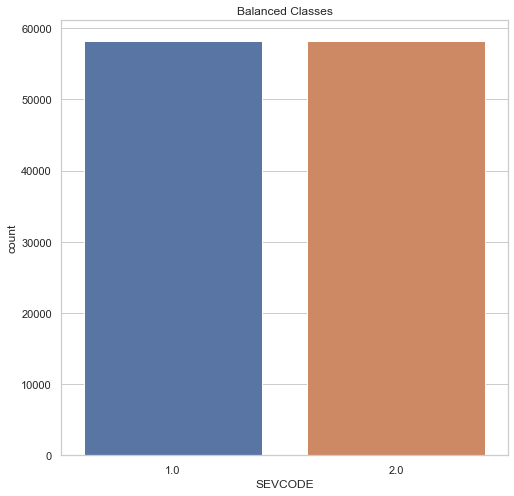

In [165]:
#Randomly select 492 observations from the non-fraud (majority class)
sev1_df = shuffled_df.loc[shuffled_df['SEVCODE'] == 1].sample(n=sev2_df.shape[0],random_state=42)

# Concatenate both dataframes again
undersampled_df = pd.concat([sev1_df, sev2_df])

#plot the dataset after the undersampling
plt.figure(figsize=(8, 8))
sns.countplot('SEVCODE', data=undersampled_df)
plt.title('Balanced Classes')
plt.show()

In [166]:
model_correl_df = model_df.corr()
model_correl_df.to_csv('model_correl_df.csv')
model_correl_df

,X,Y,INTKEY,SEVCODE,SEVERITYDESC,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SDOT_COLCODE,...,HofD,Year,Month,Day,colltype_code,addrtype_code,junctype_code,weather_code,roadcond_code,lightcond_code
X,1.000000,-0.160262,0.005837,0.010193,0.006582,0.013003,0.011049,-0.001772,-0.011080,0.010664,...,0.010550,0.008515,0.001111,-0.002124,0.008160,0.005452,-0.014606,-0.008990,-0.007504,-0.005898
Y,-0.160262,1.000000,0.034159,0.017538,0.015955,-0.013750,0.010255,0.025751,0.016637,-0.019384,...,0.015222,-0.015793,0.005482,0.001598,-0.034172,0.031907,-0.034425,0.024324,0.018677,0.026826
INTKEY,0.005837,0.034159,1.000000,0.199089,0.121413,0.067314,0.144384,0.084983,-0.053760,-0.042005,...,0.060240,0.092775,0.020086,0.023248,-0.458307,0.911708,-0.817339,0.004644,0.005836,0.014465
SEVCODE,0.010193,0.017538,0.199089,1.000000,0.798391,0.131106,0.244189,0.213417,-0.037796,0.176616,...,0.055722,0.082250,0.026834,0.020758,-0.143921,0.172032,-0.221984,-0.126911,-0.112581,-0.105271
SEVERITYDESC,0.006582,0.015955,0.121413,0.798391,1.000000,0.077853,0.189623,0.165109,-0.178556,0.147875,...,-0.109804,-0.426093,-0.135642,-0.144974,0.057944,0.236959,0.070671,-0.070066,-0.061696,-0.051425
PERSONCOUNT,0.013003,-0.013750,0.067314,0.131106,0.077853,1.000000,-0.021678,-0.037689,0.384922,-0.153336,...,0.058466,0.015147,0.015106,0.016505,-0.020606,0.052997,-0.100938,0.199154,0.174985,0.207750
PEDCOUNT,0.011049,0.010255,0.144384,0.244189,0.189623,-0.021678,1.000000,-0.016417,-0.250677,0.273919,...,0.038552,0.040699,0.015093,0.014294,0.067898,0.127093,-0.127089,-0.436186,-0.387597,-0.405574
PEDCYLCOUNT,-0.001772,0.025751,0.084983,0.213417,0.165109,-0.037689,-0.016417,1.000000,-0.244355,0.402440,...,0.035362,0.044242,0.015314,0.006813,-0.208641,0.073585,-0.091451,-0.124484,-0.127377,-0.082598
VEHCOUNT,-0.011080,0.016637,-0.053760,-0.037796,-0.178556,0.384922,-0.250677,-0.244355,1.000000,-0.402974,...,0.175164,0.152571,0.076145,0.073476,-0.109506,-0.102884,-0.052955,0.416988,0.363946,0.418055
SDOT_COLCODE,0.010664,-0.019384,-0.042005,0.176616,0.147875,-0.153336,0.273919,0.402440,-0.402974,1.000000,...,-0.028103,-0.001137,0.005905,0.002280,0.000702,-0.027925,-0.035757,-0.644981,-0.560359,-0.620985


In [167]:
unsamp_model_correl_df = undersampled_df.corr()
unsamp_model_correl_df.to_csv('unsamp_model_correl_df.csv')
unsamp_model_correl_df

,X,Y,INTKEY,SEVCODE,SEVERITYDESC,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SDOT_COLCODE,...,HofD,Year,Month,Day,colltype_code,addrtype_code,junctype_code,weather_code,roadcond_code,lightcond_code
X,1.000000,-0.162887,0.002240,0.009592,0.005708,0.012544,0.011908,-0.003797,-0.009521,0.006433,...,0.016947,0.010823,-0.000045,0.001725,0.011325,0.001981,-0.010452,-0.007885,-0.005980,-0.005139
Y,-0.162887,1.000000,0.041632,0.020087,0.019273,-0.014985,0.011404,0.032036,0.011377,-0.011493,...,0.017125,-0.015553,0.006166,0.002390,-0.036618,0.039427,-0.042323,0.018851,0.014163,0.021103
INTKEY,0.002240,0.041632,1.000000,0.211984,0.155866,0.051729,0.157266,0.087900,-0.077595,-0.035114,...,0.061533,0.087434,0.014342,0.022236,-0.470648,0.931712,-0.836832,-0.009824,-0.007502,0.001033
SEVCODE,0.009592,0.020087,0.211984,1.000000,0.861096,0.137470,0.214437,0.187797,-0.039622,0.175444,...,0.062098,0.097281,0.027452,0.020591,-0.155987,0.187032,-0.245849,-0.129357,-0.115101,-0.108290
SEVERITYDESC,0.005708,0.019273,0.155866,0.861096,1.000000,0.097898,0.179560,0.156821,-0.138895,0.154076,...,-0.063298,-0.309704,-0.094553,-0.103424,-0.006252,0.234364,-0.021931,-0.088312,-0.078496,-0.068935
PERSONCOUNT,0.012544,-0.014985,0.051729,0.137470,0.097898,1.000000,-0.038733,-0.057198,0.405304,-0.160035,...,0.056160,0.006870,0.011272,0.014044,-0.017393,0.040029,-0.086493,0.199728,0.174717,0.208388
PEDCOUNT,0.011908,0.011404,0.157266,0.214437,0.179560,-0.038733,1.000000,-0.033884,-0.298893,0.301256,...,0.042958,0.045038,0.016608,0.015725,0.099175,0.141250,-0.139657,-0.506774,-0.449494,-0.480523
PEDCYLCOUNT,-0.003797,0.032036,0.087900,0.187797,0.156821,-0.057198,-0.033884,1.000000,-0.290296,0.450366,...,0.039361,0.052137,0.016929,0.004490,-0.245978,0.077706,-0.097270,-0.137760,-0.142033,-0.091113
VEHCOUNT,-0.009521,0.011377,-0.077595,-0.039622,-0.138895,0.405304,-0.298893,-0.290296,1.000000,-0.435901,...,0.143104,0.110413,0.055182,0.053579,-0.069244,-0.112397,-0.012411,0.450001,0.394588,0.447652
SDOT_COLCODE,0.006433,-0.011493,-0.035114,0.175444,0.154076,-0.160035,0.301256,0.450366,-0.435901,1.000000,...,-0.012367,0.014535,0.010887,0.004745,-0.003074,-0.027143,-0.019621,-0.687262,-0.608257,-0.653468


In [168]:
predictor_df = model_df.copy()
predictor_df.drop('SEVCODE', axis = 1, inplace = True)
target_df = model_df.copy()
target_df = target_df[['SEVCODE']] - 1

In [169]:
predictor_df = predictor_df.reset_index(drop=True)
target_df = target_df.reset_index(drop=True)

In [170]:
predictor_df.head(5)

,X,Y,INTKEY,SEVERITYDESC,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SDOT_COLCODE,INATTENTIONIND,...,HofD,Year,Month,Day,colltype_code,addrtype_code,junctype_code,weather_code,roadcond_code,lightcond_code
0,-122.323148,47.703140,1.0,1.0,2.0,0.0,0.0,2.0,11.0,0.0,...,15.0,2013.0,3.0,27.0,0.0,2.0,1.0,11.0,9.0,9.0
1,-122.347294,47.647172,0.0,0.0,2.0,0.0,0.0,2.0,16.0,0.0,...,19.0,2006.0,12.0,20.0,9.0,1.0,4.0,11.0,9.0,9.0
2,-122.334540,47.607871,0.0,0.0,4.0,0.0,0.0,3.0,14.0,0.0,...,10.0,2004.0,11.0,18.0,5.0,1.0,4.0,11.0,9.0,9.0
3,-122.334803,47.604803,0.0,0.0,3.0,0.0,0.0,3.0,11.0,0.0,...,9.0,2013.0,3.0,29.0,4.0,1.0,4.0,11.0,9.0,9.0
4,-122.306426,47.545739,1.0,1.0,2.0,0.0,0.0,2.0,11.0,0.0,...,8.0,2004.0,1.0,28.0,0.0,2.0,1.0,11.0,9.0,9.0


In [171]:
target_df
count_sev0 = len(target_df[target_df['SEVCODE']==0])
count_sev1 = len(target_df[target_df['SEVCODE']==1])
pct_sev0 = count_sev0/(count_sev0+count_sev1)
print("percentage sev0", round(pct_sev0*100,2))
pct_sev1 = count_sev1/(count_sev0+count_sev1)
print("percentage sev1", round(pct_sev1*100,2))

percentage sev0 70.11
percentage sev1 29.89


In [172]:
import pandas as pd
from sklearn import preprocessing

x = predictor_df.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
nmodel_df = pd.DataFrame(x_scaled, index=predictor_df.index, columns=predictor_df.columns)
nmodel_df

,X,Y,INTKEY,SEVERITYDESC,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SDOT_COLCODE,INATTENTIONIND,...,HofD,Year,Month,Day,colltype_code,addrtype_code,junctype_code,weather_code,roadcond_code,lightcond_code
0,0.532596,0.870053,1.0,0.5,0.024691,0.0,0.0,0.166667,0.159420,0.0,...,0.625000,0.86,0.181818,0.866667,0.0,0.666667,0.142857,1.000000,1.0,1.000000
1,0.398557,0.635455,0.0,0.0,0.024691,0.0,0.0,0.166667,0.231884,0.0,...,0.791667,0.72,1.000000,0.633333,0.9,0.333333,0.571429,1.000000,1.0,1.000000
2,0.469359,0.470718,0.0,0.0,0.049383,0.0,0.0,0.250000,0.202899,0.0,...,0.416667,0.68,0.909091,0.566667,0.5,0.333333,0.571429,1.000000,1.0,1.000000
3,0.467897,0.457855,0.0,0.0,0.037037,0.0,0.0,0.250000,0.159420,0.0,...,0.375000,0.86,0.181818,0.933333,0.4,0.333333,0.571429,1.000000,1.0,1.000000
4,0.625423,0.210281,1.0,0.5,0.024691,0.0,0.0,0.166667,0.159420,0.0,...,0.333333,0.68,0.000000,0.900000,0.0,0.666667,0.142857,1.000000,1.0,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194668,0.712022,0.292726,0.0,0.5,0.037037,0.0,0.0,0.166667,0.159420,0.0,...,0.333333,0.96,0.909091,0.366667,0.2,0.333333,0.571429,1.000000,1.0,1.000000
194669,0.413924,0.818844,0.0,0.0,0.024691,0.0,0.0,0.166667,0.202899,0.0,...,0.375000,0.96,1.000000,0.566667,0.7,0.333333,0.571429,1.000000,1.0,1.000000
194670,0.623967,0.785828,1.0,0.5,0.037037,0.0,0.0,0.166667,0.159420,0.0,...,0.375000,0.98,0.000000,0.600000,0.3,0.666667,0.142857,1.000000,1.0,1.000000
194671,0.354024,0.767751,1.0,0.5,0.024691,0.0,0.5,0.083333,0.739130,0.0,...,0.708333,0.98,0.000000,0.466667,0.1,0.666667,0.142857,0.090909,0.0,0.666667
